# Kaggle_Abalone

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? 
Nothing done.


[**Matplotlib Package**](https://matplotlib.org)  
[**Seaborn Package**](https://seaborn.pydata.org)  
[**Plotly Package**](https://plotly.com)

In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from IPython.display import display, HTML

pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows',  30)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

%matplotlib inline
%config InlineBackend.figure_format ='retina' # To render highter resolution images

### Features
- **Sex** / nominal / -- / M, F, and I (infant)
- **Length** / continuous / mm / Longest shell measurement
- **Diameter** / continuous / mm / perpendicular to length
- **Height** / continuous / mm / with meat in shell
- **Whole weight** / continuous / grams / whole abalone
- **Shucked weight** / continuous / grams / weight of meat
- **Viscera weight** / continuous / grams / gut weight (after bleeding)
- **Shell weight** / continuous / grams / after being dried
- **Rings** / integer / -- / +1.5 gives the age in year

## EDA (Exploratory data analysis)
### pandas

In [58]:
df = pd.read_csv('./abalone.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


$\rightarrow \textbf{There is no missing Value}$

In [59]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


$ \rightarrow \textbf{1 Categorical Feature, 8 Numerical Features}$

In [60]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sex,4177,3,M,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Length,4177.0,NaN,NaN,NaN,0.523992,0.120093,0.075,0.45,0.545,0.615,0.815
Diameter,4177.0,NaN,NaN,NaN,0.407881,0.09924,0.055,0.35,0.425,0.48,0.65
Height,4177.0,NaN,NaN,NaN,0.139516,0.041827,0.0,0.115,0.14,0.165,1.13
Whole weight,4177.0,NaN,NaN,NaN,0.828742,0.490389,0.002,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,NaN,NaN,NaN,0.359367,0.221963,0.001,0.186,0.336,0.502,1.488
Viscera weight,4177.0,NaN,NaN,NaN,0.180594,0.109614,0.0005,0.0935,0.171,0.253,0.76
Shell weight,4177.0,NaN,NaN,NaN,0.238831,0.139203,0.0015,0.13,0.234,0.329,1.005
Rings,4177.0,NaN,NaN,NaN,9.933684,3.224169,1.0,8.0,9.0,11.0,29.0


$ \rightarrow \textbf{A few outliers in the numerical data}$  
- Max for Height
- Max for Shucked weight

1. Just apply clamping
2. Simply use models/methods that are less sensitive to outliers
    - For instance
        - scaling using a standard scaler
        - modelling using something like a random forest.

### pandas_profiling.ProfileReport

In [61]:
profile = ProfileReport(df, title="Profiling Report",
                        dataset={"description": "This profiling report was generated for Jaehwan Jeong",
                                 "copyright_holder": "Jaehwan Jeong",
                                 "copyright_year": "2022",
                                },
                        explorative=True,
                       )
profile.to_file("Profile_Abalone.html")

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

$ \rightarrow \textbf{The data quality is not problematic} $

### seaborn.pairplot

<Figure size 720x720 with 0 Axes>

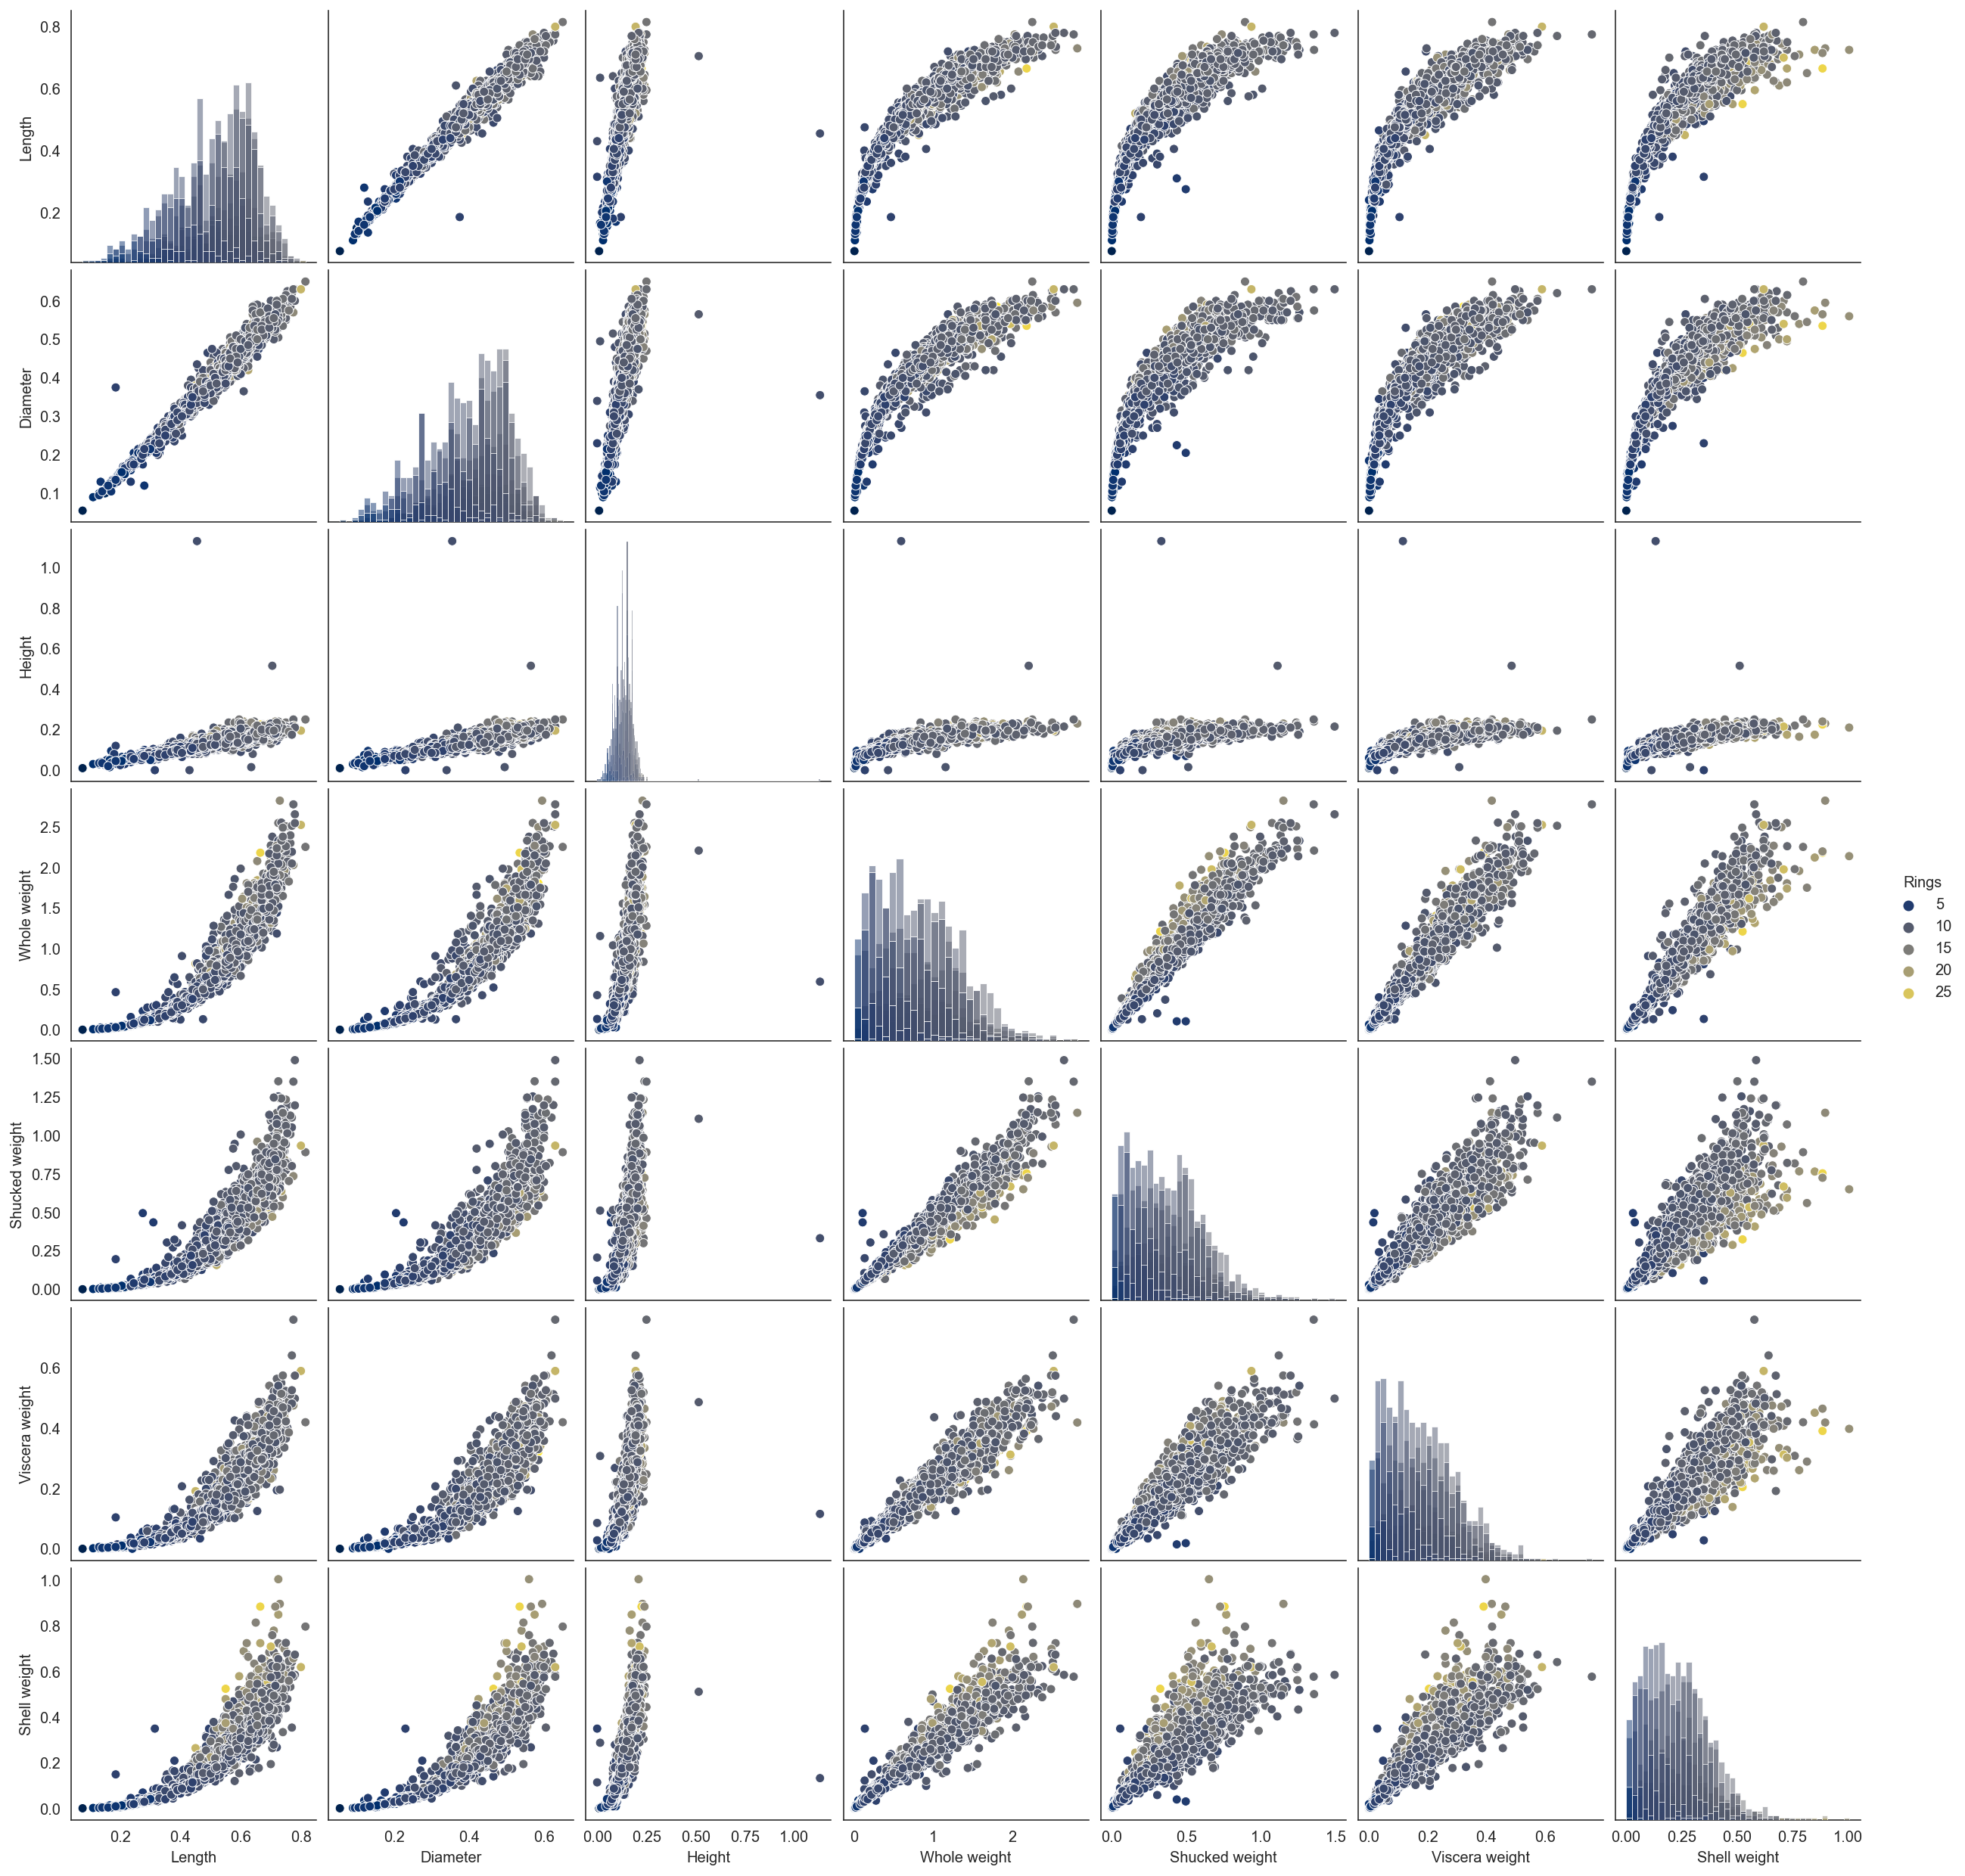

In [83]:
display(HTML("<style>div.output_scroll { height: 72em; }</style>")) ## Control to Ouput height size

plt.figure(figsize=(10,10))
sns.set_style('white') # Background Color
plot_kws={"s":1}
g = sns.pairplot(df, #pandas.DataFrame
                 #kind ='reg',
                 diag_kind='hist',
                 corner=False, #If True, don't add aes to the upper triangle of the grid
                 palette='cividis', # Set of colors for mapping the hue variable
                 hue='Rings' # Variable in data to map plot aspects to different colors
                )
plt.show()

$ \rightarrow \textbf{Not clear clusters at a first glance} \\
\qquad \bullet \text{Need to transform the data} \\
\qquad \bullet \text{PCA is immediately considered}
$

### seaborn.heatmap

$\begin{aligned}
    &\textbf{피어슨상관계수} = \cfrac{\textbf{공분산}}{\textbf{표준편차}\boldsymbol{\cdot}\textbf{표준편차}} \\
    \rightarrow \quad &r_{XY} = \cfrac{
                \sum\limits_i ^n{(X_i - \overline X)(Y_i - \overline Y)}
                 }{
                \sqrt{\sum\limits_i ^n{(X_i - \overline X)^2}}
                \sqrt{\sum\limits_i ^n{(Y_i - \overline Y)^2}}
                 } \\
     &\bullet \quad \text{PCC란 두 변수 X와 Y 간의 선형 상관 관계를 계량화한 수치} \\
     &\bullet \quad \text{Cauchy-Schwarz Inequality에 의해 -1~1 사이의 값을 가짐} \\
     &\bullet \quad \text{+1: 완벽한 양의 선형 상관 관계, 하나가 증가할 때 다른 하나도 함께 증가} \\
     &\bullet \quad \text{0 : 상관관계 없음} \\
     &\bullet \quad \text{-1: 완벽한 음의 선형 상관 관계, 하나가 증가할 때 다른 하나는 감소}
\end{aligned}$

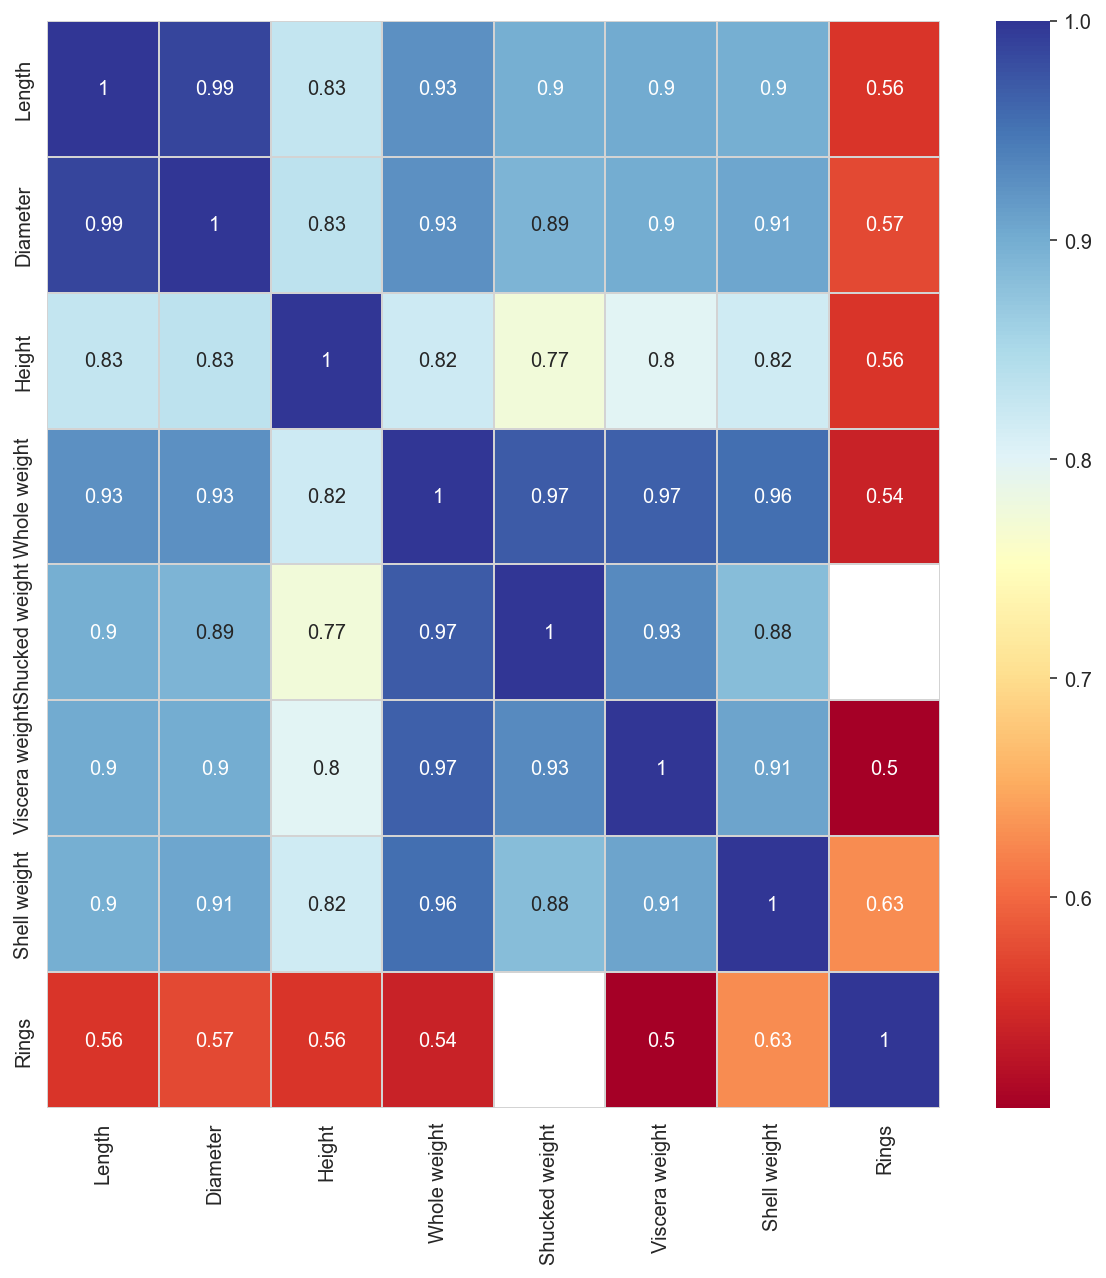

In [84]:
plt.figure(figsize=(10,10))
threshold = 0.5
sns.set_style("whitegrid", {"axes.facecolor": ".0"}) # background style: whitegrid, alpha: 0
df_cluster2 = df.corr() # pearson correlation(*default)
mask= df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s":1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')